In [1]:
!pip install opencv-python

In [2]:
!pip install -U scikit-learn

In [3]:
!pip install matplotlib

In [4]:
!pip install logic

  Created wheel for logic: filename=logic-0.2.3-py3-none-any.whl size=13725 sha256=7ee90d772dd1ddc87f8b8cb281df65cbd20f75f0eff52c70ff92bd981f468a6c
  Stored in directory: /root/.cache/pip/wheels/37/3f/25/d8224026dd727271dffcf8abe834f988a0e04395808332ff5a
Successfully built logic


In [5]:
!pip install numpy

***LOGISTIC REGRESSION*** 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 


In [7]:


def visualize_classifier(classifier, X, y):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()



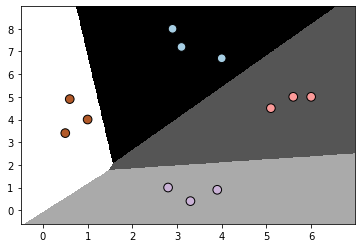

In [8]:
# Define sample input data
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

# Create the logistic regression classifier
classifier = linear_model.LogisticRegression(solver='liblinear', C=1)

# Train the classifier
classifier.fit(X, y)

# Visualize the performance of the classifier 
visualize_classifier(classifier, X, y)

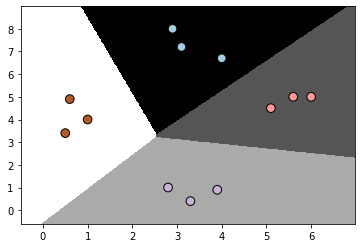

In [9]:
classifier = linear_model.LogisticRegression(solver='liblinear', C=100)
# Train the classifier
classifier.fit(X, y)

# Visualize the performance of the classifier 
visualize_classifier(classifier, X, y)

***DECISION TREES***


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [12]:
def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

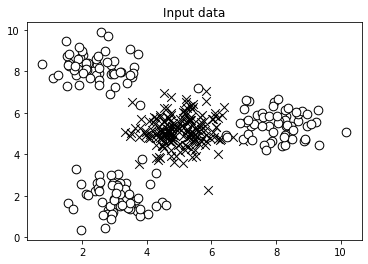

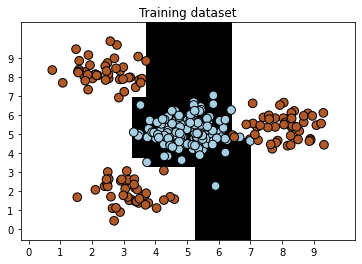

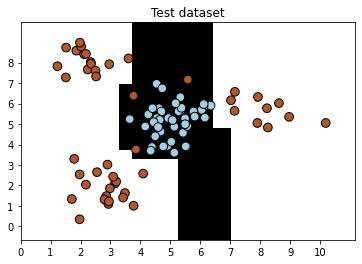


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

########################################



In [13]:
# Load input data from google drive
input_file = '/content/drive/My Drive/Data UTS AI/data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Separate input data into two classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
        edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
        edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=5)

# Decision Trees classifier 
params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

# Evaluate classifier performance
class_names = ['Class-0', 'Class-1']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

plt.show()

***DATA CLUSTERING***

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle


Centers of clusters:
 [[2.95568966 1.95775862]
 [7.20690909 2.20836364]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.99466667 4.65844444]]

Number of clusters in input data = 5


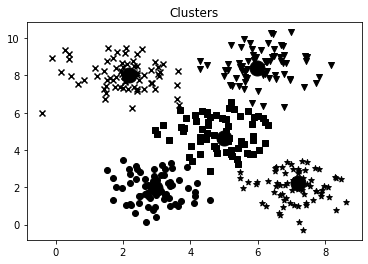

In [16]:
# Load data from input file
X = np.loadtxt('/content/drive/My Drive/Data UTS AI/data_clustering.txt', delimiter=',')

# Estimate the bandwidth of X
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

# Cluster data with MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

# Extract the centers of clusters
cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)

# Estimate the number of clusters
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)

# Plot the points and cluster centers
plt.figure()
markers = 'o*xvs'
for i, marker in zip(range(num_clusters), markers):
    # Plot points that belong to the current cluster
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='black')

    # Plot the cluster center
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o', 
            markerfacecolor='black', markeredgecolor='black', 
            markersize=15)

plt.title('Clusters')
plt.show()

***NEAREST NEIGHBOUR CLASSIFIER***

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note li

Predicted output: 1


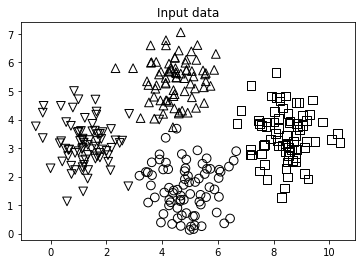

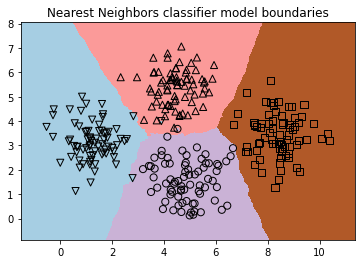

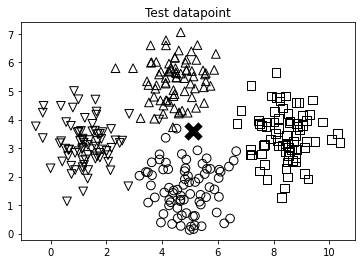

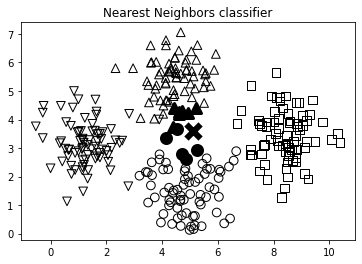

In [19]:
# Load input data
input_file = '/content/drive/My Drive/Data UTS AI/data.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1].astype(np.int)

# Plot input data
plt.figure()
plt.title('Input data')
marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y]
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

# Number of nearest neighbors 
num_neighbors = 12

# Step size of the visualization grid
step_size = 0.01  

# Create a K Nearest Neighbours classifier model 
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')

# Train the K Nearest Neighbours model
classifier.fit(X, y)

# Create the mesh to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size))

# Evaluate the classifier on all the points on the grid 
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

# Visualize the predicted output 
output = output.reshape(x_values.shape)
plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)

# Overlay the training points on the map
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')

plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('Nearest Neighbors classifier model boundaries')

# Test input datapoint
test_datapoint = [5.1, 3.6]
plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=6, s=200, facecolors='black')

# Extract the K nearest neighbors
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(np.int)[0]

# Plot k nearest neighbors
plt.figure()
plt.title('Nearest Neighbors classifier')

for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[y[i]], 
            linewidth=3, s=100, facecolors='black')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=6, s=200, facecolors='black')

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

print("Predicted output:", classifier.predict([test_datapoint])[0])

plt.show()

***STATES***

In [20]:
!pip install 'git+https://github.com/MHordecki/LogPy#egg=logPy'

  Cloning https://github.com/MHordecki/LogPy to /tmp/pip-install-03bz6xsz/logpy_957b7bbf966542e1b7f60a5b1901f7cb
  Running command git clone -q https://github.com/MHordecki/LogPy /tmp/pip-install-03bz6xsz/logpy_957b7bbf966542e1b7f60a5b1901f7cb
  Created wheel for logPy: filename=LogPy-1.0.1-py3-none-any.whl size=4688 sha256=dac6a2a3b6904b1977addb3c086342f2209e2c61217d916c51ac282064f8b9a9
  Stored in directory: /tmp/pip-ephem-wheel-cache-if5jne2h/wheels/51/4b/6c/6b71671057d63f6acadb92124d3a5856b77b6f8233450c88bd
Successfully built logPy


In [21]:
from logpy import run, fact, eq, Relation, var

adjacent = Relation()
coastal = Relation()

file_coastal = '/content/drive/My Drive/Data UTS AI/coastal_states.txt'
file_adjacent = '/content/drive/My Drive/Data UTS AI/adjacent_states.txt'

# Read the file containing the coastal states
with open(file_coastal, 'r') as f:
    line = f.read()
    coastal_states = line.split(',')

# Add the info to the fact base
for state in coastal_states:
    fact(coastal, state)

# Read the file containing the coastal states
with open(file_adjacent, 'r') as f:
    adjlist = [line.strip().split(',') for line in f if line and line[0].isalpha()]

# Add the info to the fact base
for L in adjlist:
    head, tail = L[0], L[1:]
    for state in tail:
        fact(adjacent, head, state)

# Initialize the variables
x = var()
y = var()

# Is Nevada adjacent to Louisiana?
output = run(0, x, adjacent('Nevada', 'Louisiana'))
print('\nIs Nevada adjacent to Louisiana?:')
print('Yes' if len(output) else 'No')

# States adjacent to Oregon
output = run(0, x, adjacent('Oregon', x))
print('\nList of states adjacent to Oregon:')
for item in output:
    print(item)

# States adjacent to Mississippi that are coastal
output = run(0, x, adjacent('Mississippi', x), coastal(x))
print('\nList of coastal states adjacent to Mississippi:')
for item in output:
    print(item)

# List of 'n' states that border a coastal state
n = 7
output = run(n, x, coastal(y), adjacent(x, y))
print('\nList of ' + str(n) + ' states that border a coastal state:')
for item in output:
    print(item)

# List of states that adjacent to the two given states
output = run(0, x, adjacent('Arkansas', x), adjacent('Kentucky', x))
print('\nList of states that are adjacent to Arkansas and Kentucky:')
for item in output:
    print(item)


Is Nevada adjacent to Louisiana?:
No

List of states adjacent to Oregon:
Washington
Nevada
California
Idaho

List of coastal states adjacent to Mississippi:
Louisiana
Alabama

List of 7 states that border a coastal state:
Vermont
New Mexico
Rhode Island
Oregon
Florida
Texas
Connecticut

List of states that are adjacent to Arkansas and Kentucky:
Missouri
Tennessee
